## Decision Trees vs Random Forests
In  this exercise, you will compare the decision tree classifier with random forests.
0. Visualize the created datasets
1. Use the train_test_split function to split the dataset into 30/70 sets (set random seed=1)
2. Fit a decision tree to all 3 datasets and report train and test accuracy (random seed=1, default hyperparameters)
3. Do the same for a random forest with 20 trees (random seed=1, default hyperparameters)
4. plot the decision contours on all 6 datasets and comment on their differences. 
5. What can you say about the bias and variance of each classifier? Do you observe any over or under-fitting?
6. plot the 2 ROC curves for each dataset in 6 different plots. Also report the area under each curve.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#import packages here
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# function for decision region plotting
# imported from DecisionTree notebook
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


Dataset - 0



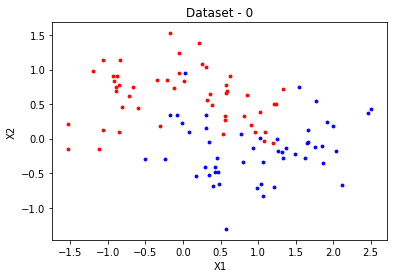

The train accuracy score using Decision trees is : 1.0
The test accuracy score using Decision trees is : 0.9333333333333333

The train accuracy score using random forest is : 1.0
The test accuracy score using random forest is : 1.0


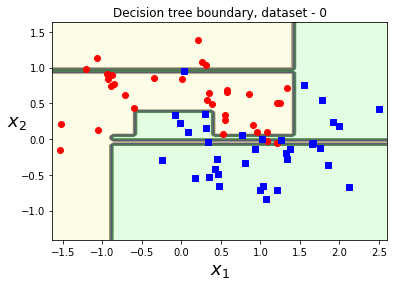

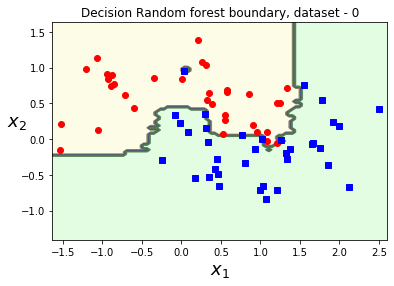

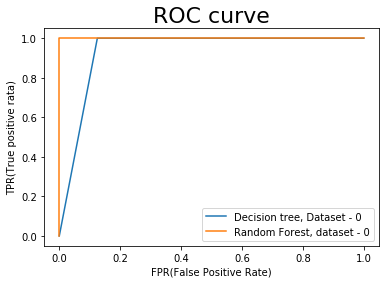

Decision tree, AUC : 0.9375
Random Forest, AUC : 1.0



Dataset - 1



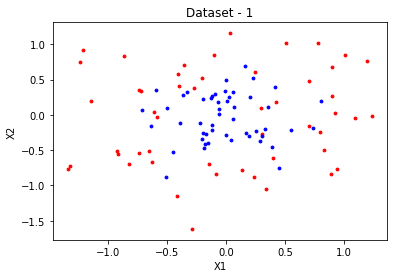

The train accuracy score using Decision trees is : 1.0
The test accuracy score using Decision trees is : 0.7333333333333333

The train accuracy score using random forest is : 1.0
The test accuracy score using random forest is : 0.7666666666666667


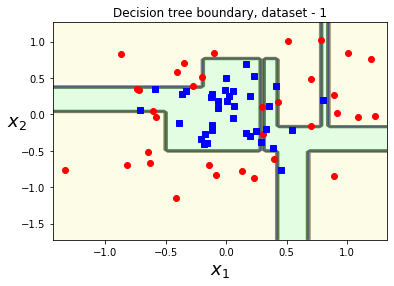

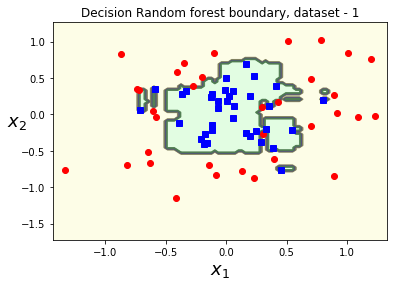

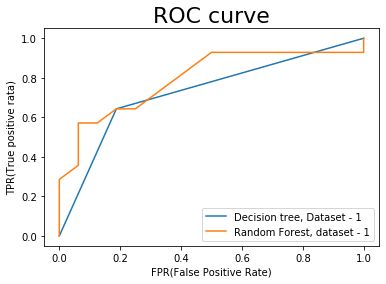

Decision tree, AUC : 0.7276785714285714
Random Forest, AUC : 0.7946428571428572



Dataset - 2



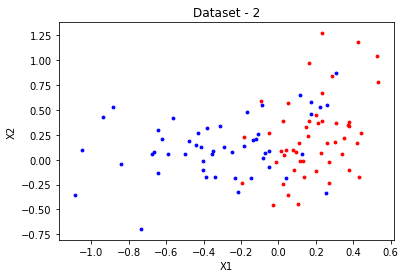

The train accuracy score using Decision trees is : 1.0
The test accuracy score using Decision trees is : 0.8333333333333334

The train accuracy score using random forest is : 1.0
The test accuracy score using random forest is : 0.8333333333333334


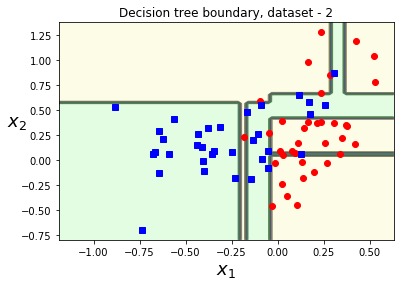

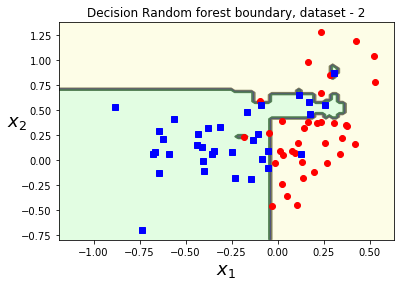

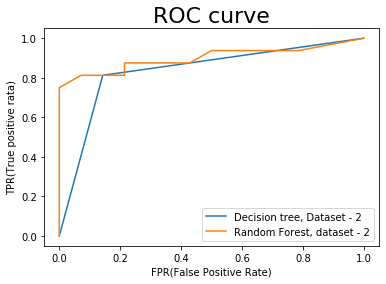

Decision tree, AUC : 0.8348214285714286
Random Forest, AUC : 0.8995535714285715



Dataset - 3



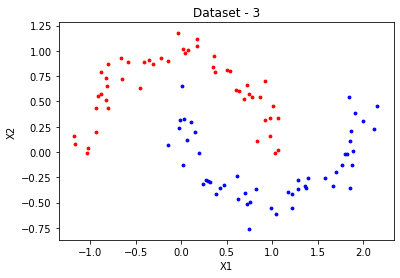

The train accuracy score using Decision trees is : 1.0
The test accuracy score using Decision trees is : 0.9666666666666667

The train accuracy score using random forest is : 1.0
The test accuracy score using random forest is : 1.0


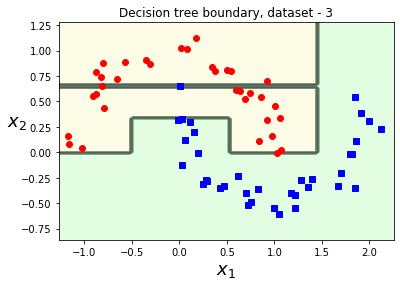

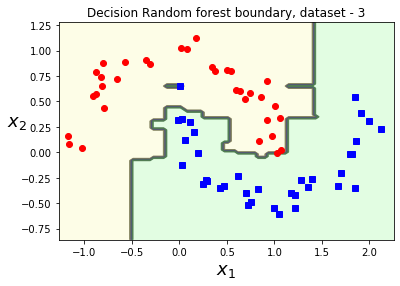

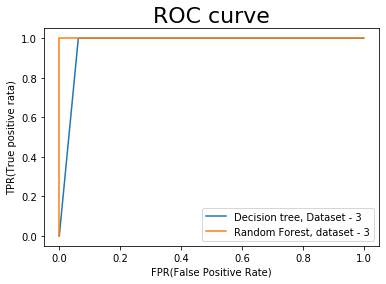

Decision tree, AUC : 0.96875
Random Forest, AUC : 1.0



Dataset - 4



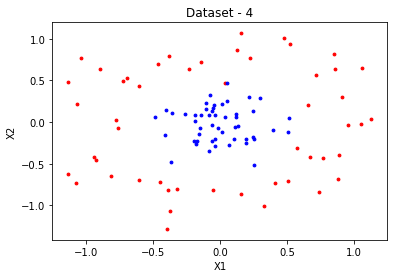

The train accuracy score using Decision trees is : 1.0
The test accuracy score using Decision trees is : 0.8666666666666667

The train accuracy score using random forest is : 1.0
The test accuracy score using random forest is : 0.9666666666666667


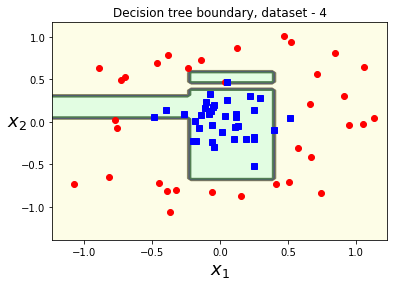

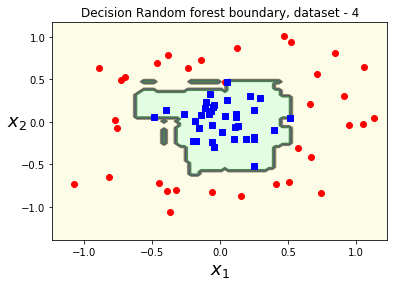

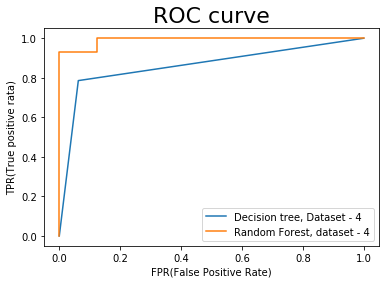

Decision tree, AUC : 0.8616071428571428
Random Forest, AUC : 0.9910714285714286



Dataset - 5



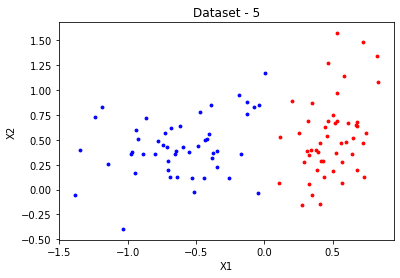

The train accuracy score using Decision trees is : 1.0
The test accuracy score using Decision trees is : 1.0

The train accuracy score using random forest is : 1.0
The test accuracy score using random forest is : 1.0


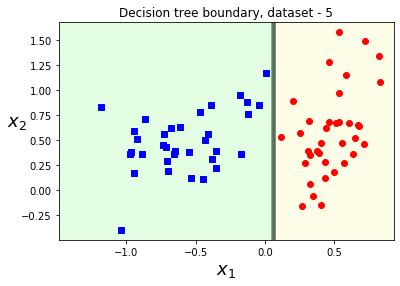

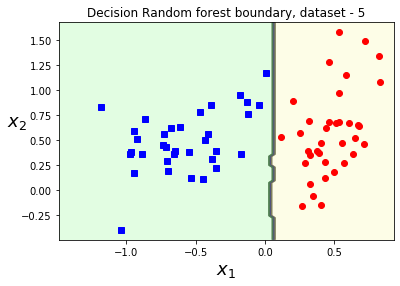

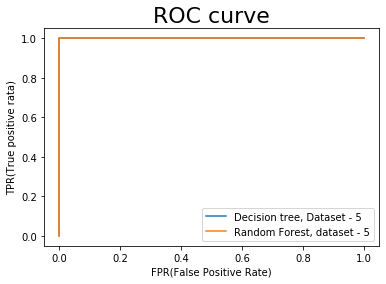

Decision tree, AUC : 1.0
Random Forest, AUC : 1.0




In [2]:
datasets=[]
for i in range(6):
    datasets.append((np.load('X{}.npy'.format(i)),np.load('y{}.npy'.format(i))))
    
    X_data = datasets[i][0]
    Y_data = datasets[i][1]
    
    print("\nDataset - {}\n".format(i))
    
    # part 0
    # visualizing the datasets
    plt.figure()
    plt.scatter(X_data[Y_data == 0,0],X_data[Y_data == 0,1],c = 'r', s = 8)
    plt.scatter(X_data[Y_data == 1,0],X_data[Y_data == 1,1], c = 'b', s = 8)
    plt.title("Dataset - {}".format(i))
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()
    # part 1
    # train - test split
    X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.3, random_state = 1) 
    # part 2
    # fitting tree
    tree = DecisionTreeClassifier(random_state = 1)
    tree = tree.fit(X_train, Y_train)
    y_pred_train = tree.predict(X_train)
    y_pred_test = tree.predict(X_test)
    print("The train accuracy score using Decision trees is :", accuracy_score(y_pred_train, Y_train))
    print("The test accuracy score using Decision trees is :", accuracy_score(y_pred_test, Y_test))
    
    # part 3
    RF = RandomForestClassifier(n_estimators = 20, random_state = 1)
    RF.fit(X_train,Y_train)
    y_pred_train_RF = RF.predict(X_train)
    y_pred_test_RF  = RF.predict(X_test)
    print("\nThe train accuracy score using random forest is :", accuracy_score(y_pred_train_RF, Y_train))
    print("The test accuracy score using random forest is :", accuracy_score(y_pred_test_RF, Y_test))
    
    # part 4
    # decision boundary for tree
    plt.figure()
    plot_decision_boundary(tree,X_train,Y_train,axes = [min(X_data[:,0])-0.1, max(X_data[:,0])+0.1, min(X_data[:,1])-0.1, max(X_data[:,1])+0.1])
    plt.title("Decision tree boundary, dataset - {}".format(i))
    plt.show()
    # decision boundary for Random forest
    plt.figure()
    plot_decision_boundary(RF,X_train,Y_train,axes = [min(X_data[:,0])-0.1, max(X_data[:,0])+0.1, min(X_data[:,1])-0.1, max(X_data[:,1])+0.1])
    plt.title("Decision Random forest boundary, dataset - {}".format(i))
    plt.show()
    
    # part 6    
    # plotting roc curves
    tree_prob = tree.predict_proba(X_test)
    tree_prob = tree_prob[:,1]
    RF_prob = RF.predict_proba(X_test)
    RF_prob = RF_prob[:,1]
    # tree
    fpr, tpr, thresh = roc_curve(Y_test, tree_prob)
    tree_auc = roc_auc_score(Y_test, tree_prob)
    # RF
    fpr2, tpr2, thresh2 = roc_curve(Y_test, RF_prob) 
    RF_auc = roc_auc_score(Y_test, RF_prob)

    plt.figure()
    plt.plot(fpr,tpr,label="Decision tree, Dataset - {}".format(i))
    plt.plot(fpr2,tpr2,label="Random Forest, dataset - {}".format(i))
    plt.title('ROC curve',fontsize=22)
    plt.legend(loc=4)
    plt.xlabel('FPR(False Positive Rate)')
    plt.ylabel('TPR(True positive rata)')
    plt.show()
    print("Decision tree, AUC :", tree_auc)
    print("Random Forest, AUC :", RF_auc)    
    print("\n===================================================================\n")

## 5
- Variance of decision tree is more, it overfits.
- Variance of the random forest is less, it doesn't overfit
- Both are having low bias.

## Digit Classification
In this exercise you will perform handwritten digit classificaiton using random forests and study the effect of hyperparameters on random forests.
1. Load the digits dataset from sklearn and visualize 10 samples.
2. Vary the number of trees in a random forest classifier from 1 to 1000 in 10 logarithmic steps using the np.logspace function and plot the accuracy. Explain the results.
3. Observe the changes in performance when you vary the max depth of trees from 1 to 10 in steps of 1. Draw an accuracy heat-map by varying both the number of trees and max depth. Explain the results. (a heatmap is a 2D array of scalars. In this case the scalar is accuracy and the axes of the matrix vary the depth and number of trees)

The images in the digits dataset are as follows :


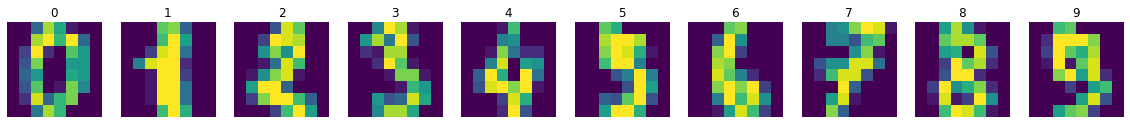

In [3]:
from sklearn.datasets import load_digits
# loading the dataset
Digits = load_digits()

# visualizing the data
print("The images in the digits dataset are as follows :")
# plotting
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(Digits.images[i])
    plt.axis('off')
    plt.title(str(Digits.target[i]))
    


Plotting training accuracy Vs n_trees


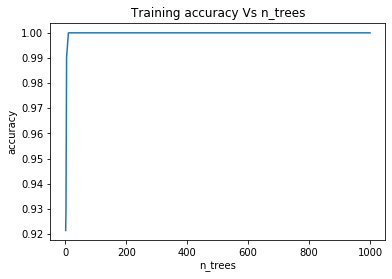

Plotting test accuracy Vs n_trees


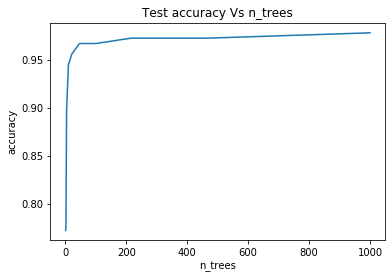

Plotting training accuracy Vs Depth


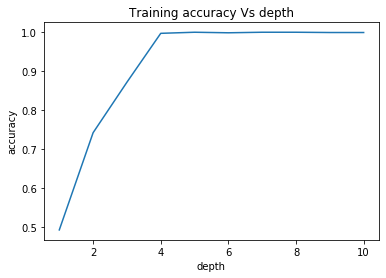

Ploting test accuracy Vs Depth


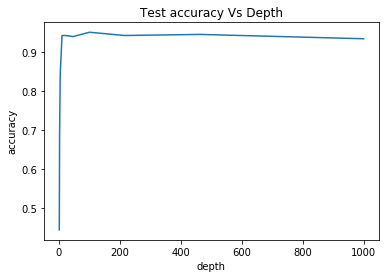

In [4]:
# splitting the dataset as train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(Digits.data, Digits.target, test_size = 0.20, random_state = 0)
# part 2
tree_range = np.logspace(0,3,num = 10, dtype = int)

train_accuracy = []
test_accuracy = []

for n_trees in tree_range:
    RF = RandomForestClassifier(n_estimators = n_trees)
    RF.fit(X_train, Y_train)
    y_pred_train = RF.predict(X_train)
    y_pred_test  = RF.predict(X_test)
    train_accuracy.append(accuracy_score(y_pred_train, Y_train))
    test_accuracy.append(accuracy_score(y_pred_test, Y_test))

# ploting accuracy
print("Plotting training accuracy Vs n_trees")
plt.figure()
plt.plot(tree_range, train_accuracy)
plt.title("Training accuracy Vs n_trees")
plt.xlabel("n_trees")
plt.ylabel("accuracy")
plt.show()

print("Plotting test accuracy Vs n_trees")
plt.figure()
plt.plot(tree_range, test_accuracy)
plt.title("Test accuracy Vs n_trees")
plt.xlabel("n_trees")
plt.ylabel("accuracy")
plt.show()

# part 3
depth_range = np.linspace(1,10,num = 10,dtype = int)

train_accuracy = []
test_accuracy = []

for depth in tree_range:
    RF = RandomForestClassifier(max_depth = depth)
    RF.fit(X_train, Y_train)
    y_pred_train = RF.predict(X_train)
    y_pred_test  = RF.predict(X_test)
    train_accuracy.append(accuracy_score(y_pred_train, Y_train))
    test_accuracy.append(accuracy_score(y_pred_test, Y_test))

# ploting accuracy
print("Plotting training accuracy Vs Depth")
plt.figure()
plt.plot(depth_range, train_accuracy)
plt.title("Training accuracy Vs depth")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.show()

print("Ploting test accuracy Vs Depth")
plt.figure()
plt.plot(tree_range, test_accuracy)
plt.title("Test accuracy Vs Depth")
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.show()


In [15]:
tree_2d = [tree_range for i in range(len(depth_range))]
tree_2d = np.array(tree_2d)
tree_2d = tree_2d.reshape(-1,1)

depth_2d = [depth_range for i in range(len(tree_range))]
depth_2d = np.array(depth_2d)
depth_2d = depth_2d.T
depth_2d = depth_2d.reshape(-1,1)

data = np.concatenate((depth_2d,tree_2d),axis = 1)

import pandas as pd

df = pd.DataFrame(data,columns = ['depth','n_trees'])

train_accuracy = []
test_accuracy = []

for i in data:
    RF = RandomForestClassifier(max_depth = i[0], n_estimators = i[1])
    RF.fit(X_train, Y_train)
    y_pred_train = RF.predict(X_train)
    y_pred_test  = RF.predict(X_test)
    train_accuracy.append(accuracy_score(y_pred_train, Y_train))
    test_accuracy.append(accuracy_score(y_pred_test, Y_test))

df['train_accuracy'] = train_accuracy
df['test_accuracy'] = test_accuracy

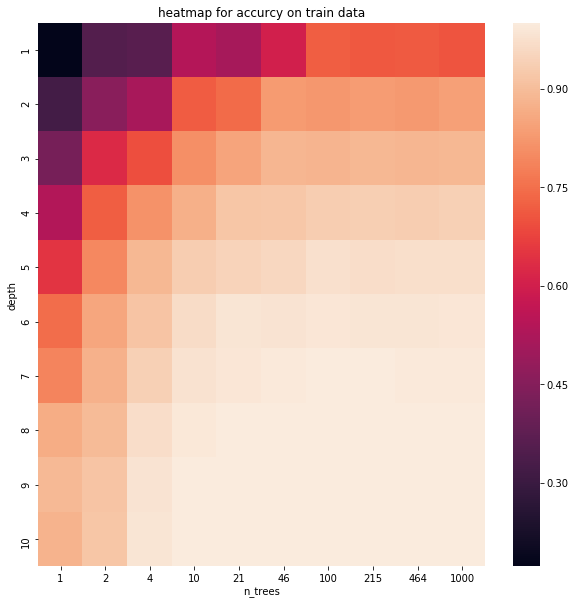

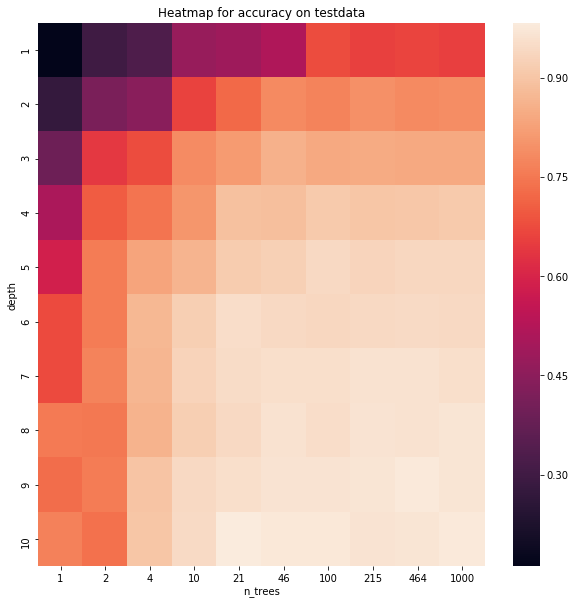

In [17]:
import seaborn as sns

train_df = df.pivot('depth','n_trees','train_accuracy')
test_df = df.pivot('depth','n_trees','test_accuracy')

# train accuracy
plt.figure(figsize = (10,10))
sns.heatmap(train_df)
plt.title("heatmap for accurcy on train data")
plt.show()

# test acuracy
plt.figure(figsize = (10,10))
sns.heatmap(test_df)
plt.title("Heatmap for accuracy on testdata")
plt.show()

## Comments :
- As the number of trees increases, the accuracy increases, because the model generalizes well without overfit.
- As maximum depth increases, the accuracy increases, because the model does not underfit.
